In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def get_worldbank_data():
    try:
        url = "https://api.worldbank.org/v2/en/country/ind/indicator/SP.POP.0014.TO.ZS;SP.POP.1564.TO.ZS;SP.POP.65UP.TO.ZS?format=json&date=2022&per_page=100"
        data = pd.read_json(url)
        indicators = data[1][0]
        values = [item['value'] for item in indicators if item['value'] is not None]
        age_groups = ['0-14 Years', '15-64 Years', '65+ Years']
        return age_groups, values
    except Exception as e:
        print(f"Error fetching data: {e}")
        return ['0-14 Years', '15-64 Years', '65+ Years'], [26.8, 67.1, 6.1]

In [6]:
age_data_bar = {
    'Age Group': ['0-14 Years', '15-64 Years', '65+ Years'],
    'Percentage': [26.8, 67.1, 6.1]
}

df_bar = pd.DataFrame(age_data_bar)
print("Bar Chart Data (Age Group Percentages):")
print(df_bar.head())

Bar Chart Data (Age Group Percentages):
     Age Group  Percentage
0   0-14 Years        26.8
1  15-64 Years        67.1
2    65+ Years         6.1


Error fetching data: 1


C:\Users\KRISHNAJI S\AppData\Local\Temp\ipykernel_11624\3108992752.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_groups, y=population_percent, palette='viridis')


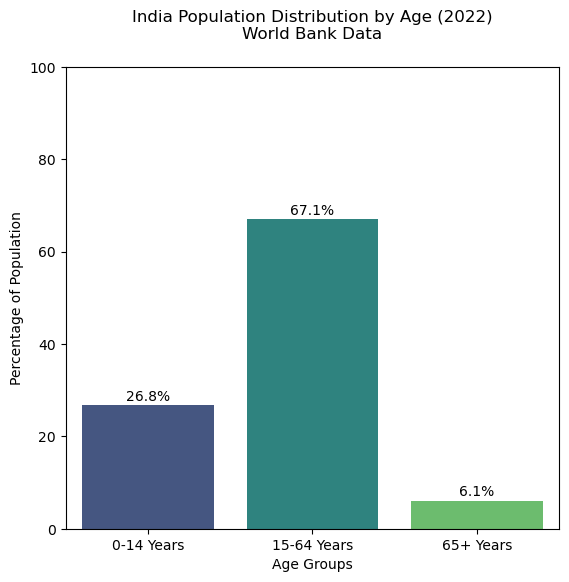

In [3]:
age_groups, population_percent = get_worldbank_data()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=age_groups, y=population_percent, palette='viridis')
plt.title('India Population Distribution by Age (2022)\nWorld Bank Data', pad=20)
plt.xlabel('Age Groups')
plt.ylabel('Percentage of Population')
plt.ylim(0, 100)
for i, p in enumerate(population_percent):
    plt.text(i, p+1, f'{p}%', ha='center')

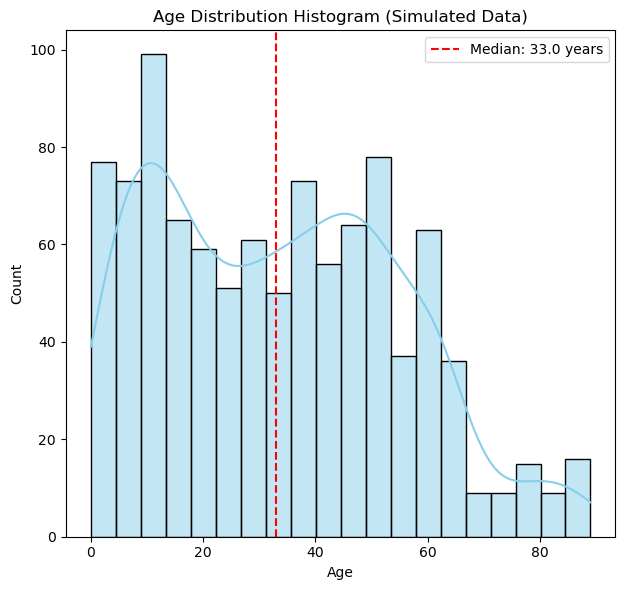

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
np.random.seed(42)

age_data = np.concatenate([
    np.random.randint(0, 15, int(1000 * population_percent[0]/100)),
    np.random.randint(15, 65, int(1000 * population_percent[1]/100)),
    np.random.randint(65, 90, int(1000 * population_percent[2]/100))
])
sns.histplot(age_data, bins=20, kde=True, color='skyblue')
plt.title('Age Distribution Histogram (Simulated Data)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.axvline(x=np.median(age_data), color='red', linestyle='--', label=f'Median: {np.median(age_data):.1f} years')
plt.legend()

plt.tight_layout()
plt.show()